# LAB 1 Bonus Track

Author: Aliprandi Francesco

In [35]:
from utils import izhikevich_bonus, plot_extra

## (K) resonator

First let's consider a case in which the neuron fires


In [36]:
condition = lambda t, T1: ((t>0.7 * 50) and (t < (0.7 * 50)+4)) or ((t>(0.7 * 50) + 40) and (t < (0.7 * 50) + 44)) 

pot, rec, tspan, in_curr, in_plot = izhikevich_bonus(
    a = 0.1, 
    b = 0.26, 
    c = -60, 
    d = -1, 
    current = 0.65, 
    condition = condition,
    u = -62,
    max_t = 170,
    beta=0
    )


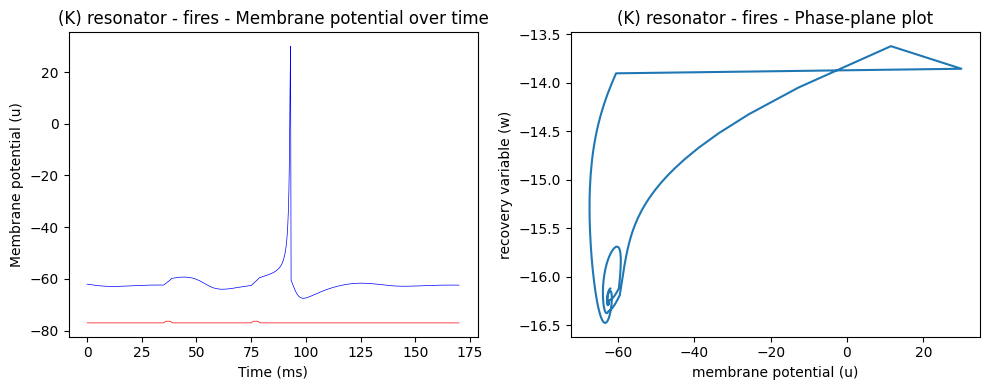

In [37]:
plot_extra(pot=pot, rec =rec, tspan=tspan, in_plot=in_plot, offset=77, title="(K) resonator - fires")


A resonator neuron fires when the timing and current value of the input align with its intrinsic damped oscillation. The first input initiates a spiral movement around the rest point, and if the second input arrives at the right phase, the oscillation amplifies it, pushing the neuron into a limit cycle and triggering a spike. Without a clear threshold, both precise timing and sufficient input intensity are essential for firing.

Now let's consider two cases for which the neuron does not fire


In [38]:
condition = lambda t, T1:  ((t>0.7 * 50) and (t < (0.7 * 50)+4)) or ((t>(0.7 * 15) + 40) and (t < (0.7 * 15) + 44))

pot, rec, tspan, in_curr, in_plot = izhikevich_bonus(
    a = 0.1, 
    b = 0.26, 
    c = -60, 
    d = -1, 
    current = 0.65, 
    condition = condition,
    u = -62,
    max_t = 170,
    beta=0
    )

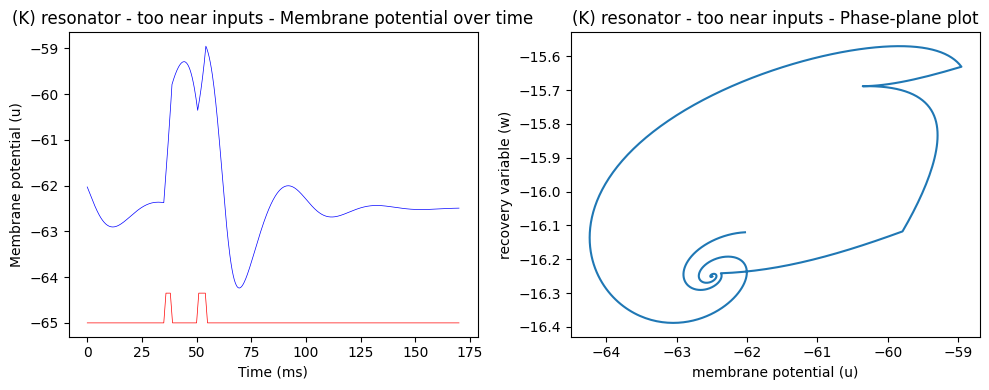

In [39]:
plot_extra(pot=pot, rec =rec, tspan=tspan, in_plot=in_plot, offset=65, title="(K) resonator - too near inputs")


When two input pulses are too frequent, the neuron remains in a subthreshold oscillatory state, where the inputs fail to accumulate enough energy to trigger a spike.

In [40]:
condition = lambda t, T1: ((t>0.7 * 40) and (t < (0.7 * 40)+4)) or ((t>(0.7 * 120) + 40) and (t < (0.7 * 120) + 44)) 

pot, rec, tspan, in_curr, in_plot = izhikevich_bonus(
    a = 0.1, 
    b = 0.26, 
    c = -60, 
    d = -1, 
    current = 0.65, 
    condition = condition,
    u = -62,
    max_t = 170,
    beta=0
    )

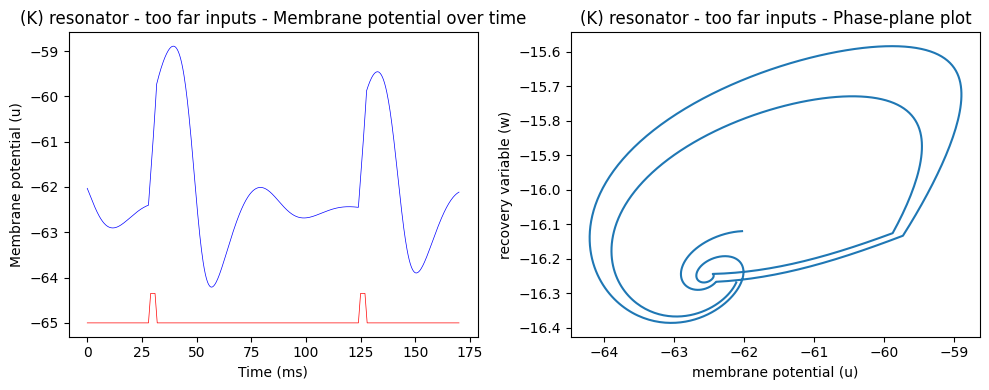

In [41]:
plot_extra(pot=pot, rec =rec, tspan=tspan, in_plot=in_plot, offset=65, title="(K) resonator - too far inputs")


In this case, the input pulses are too far apart, so the neuron resets to its resting state before the next pulse arrives. This leads to the failure to sustain its resonant response and a lack of spiking.

## (L) integrator

First let's consider a case in which the neuron fires


In [42]:
condition = lambda t, T1: ((t>T1) and (t < T1+2)) or ((t>T1+5) and (t < T1+7)) 

pot, rec, tspan, in_curr, in_plot = izhikevich_bonus(
    a = 0.02, 
    b = -0.1, 
    c = -55, 
    d = 6, 
    current = 9, 
    condition = condition,
    u = -60,
    max_t = 50,
    T1 = 100/11,
    u2 = 4.1,
    u3 = 108
    )


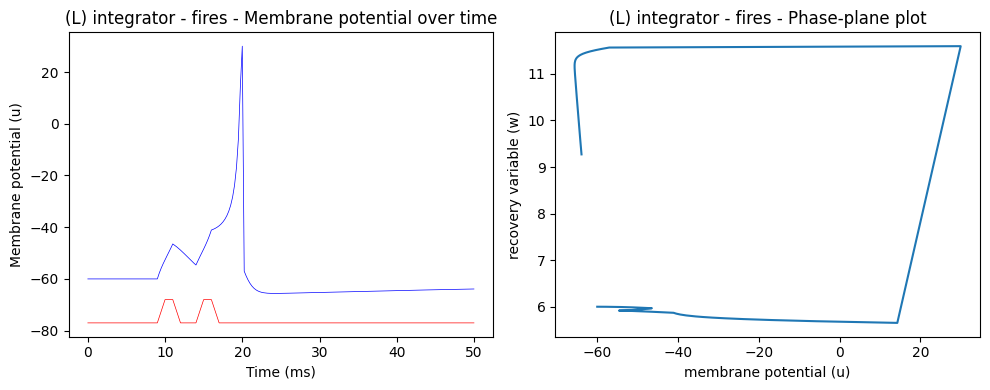

In [43]:
plot_extra(pot=pot, rec =rec, tspan=tspan, in_plot=in_plot, offset=77, title="(L) integrator - fires")


An integrator neuron fires correctly when two pulses arrive close enough in time, allowing their effects to accumulate and push the membrane potential above the threshold before it resets.

Now let's consider one case for which the neuron does not fire


In [44]:
condition = lambda t, T1: ((t>T1) and (t < T1+2)) or ((t>T1+25) and (t < T1+27)) 

pot, rec, tspan, in_curr, in_plot = izhikevich_bonus(
    a = 0.02, 
    b = -0.1, 
    c = -55, 
    d = 6, 
    current = 9, 
    condition = condition,
    u = -60,
    max_t = 50,
    T1 = 100/11,
    u2 = 4.1,
    u3 = 108
    )


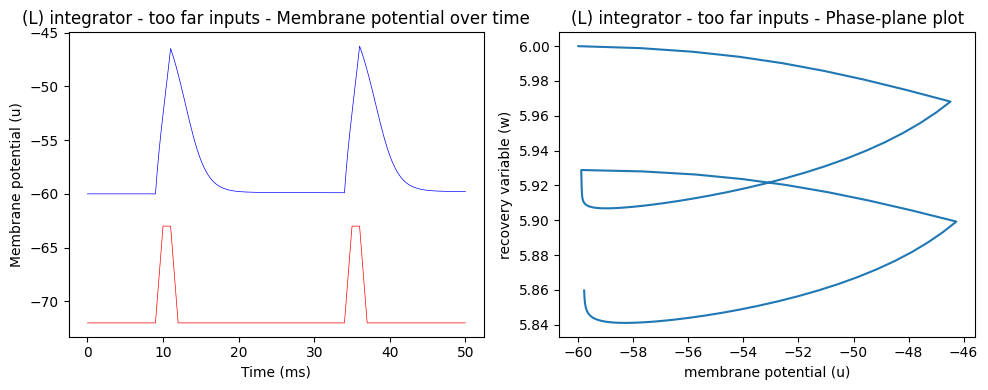

In [45]:
plot_extra(pot=pot, rec =rec, tspan=tspan, in_plot=in_plot, offset=72, title="(L) integrator - too far inputs")


If the two pulses are too far apart, the membrane potential from the first pulse will decay before the second pulse arrives. As a result, their effects do not accumulate enough to reach the firing threshold, and the neuron fails to spike.

## (P) bistability

First let's consider a case in which the neuron fires


In [46]:
k = 282
off = 5
condition = lambda t, T1: ((t>T1) and (t < T1+off)) or ((t>k) and (t < k+off))

pot, rec, tspan, in_curr, in_plot = izhikevich_bonus(
    a = 0.1,
    b = 0.26,
    c = -60,
    d = 0,
    current = 1.24,
    condition = condition,
    u = -61,
    max_t = 500,
    T1 = 500/8,
    beta = 0.24
    )

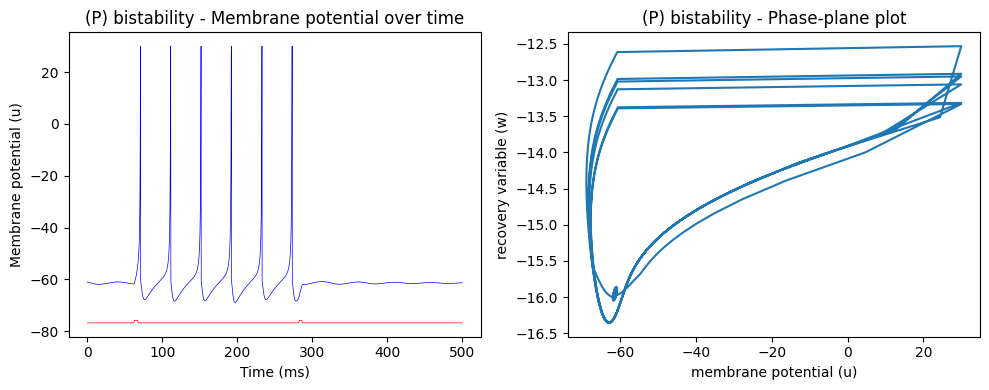

In [47]:
plot_extra(pot=pot, rec =rec, tspan=tspan, in_plot=in_plot, offset=77, title="(P) bistability")


In this scenario, the neuron exhibits bistable behavior: the initial pulse shifts its dynamics from a stable resting state to an oscillatory phase (limit cycle), while a subsequent pulse, delivered at the appropriate time and with the correct duration, brings it back to its stable point attractor.

Now let's consider two cases in which the neuron spikes are not interrupted

In [48]:
k = 300
off = 5

condition = lambda t, T1: ((t>T1) and (t < T1+off)) or ((t>k) and (t < k+off))

pot, rec, tspan, in_curr, in_plot = izhikevich_bonus(
    a = 0.1,
    b = 0.26,
    c = -60,
    d = 0,
    current = 1.24,
    condition = condition,
    u = -61,
    max_t = 500,
    T1 = 500/8,
    beta = 0.24
    )

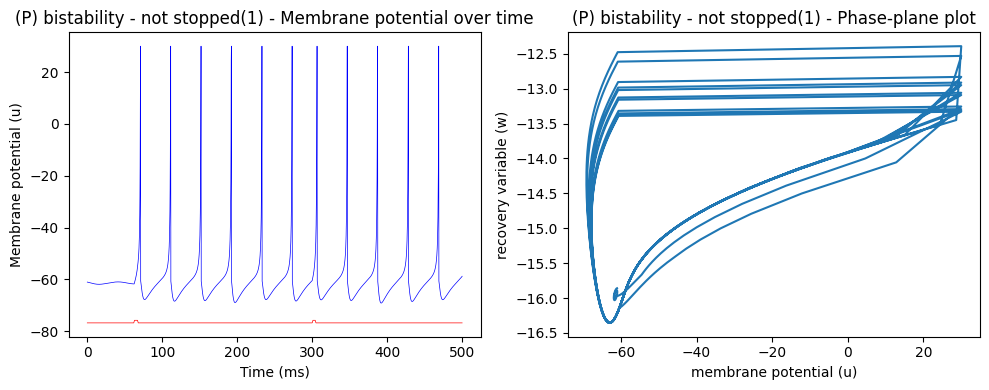

In [49]:
plot_extra(pot=pot, rec =rec, tspan=tspan, in_plot=in_plot, offset=77, title="(P) bistability - not stopped(1)")

In bistable features the timing of the second input pulse is crucial for allowing the neuron to transition from the spiking phase to the resting state. If the second pulse is applied at the wrong moment, the neuron will remain in the limit cycle, continuing to generate spike sequences without returning to the quiescent state.

In [50]:
k = 282

condition = lambda t, T1: ((t>T1) and (t < T1+off)) or ((t>k) )

pot, rec, tspan, in_curr, in_plot = izhikevich_bonus(
    a = 0.1,
    b = 0.26,
    c = -60,
    d = 0,
    current = 1.24,
    condition = condition,
    u = -61,
    max_t = 500,
    T1 = 500/8,
    beta = 0.24
    )

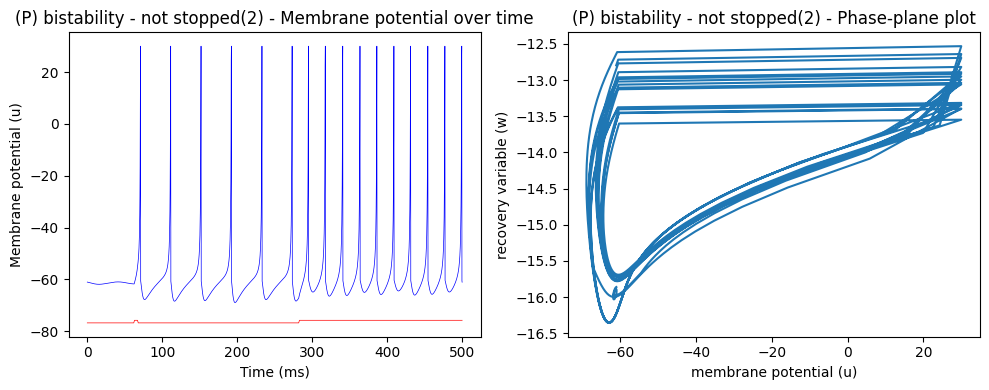

In [51]:
plot_extra(pot=pot, rec =rec, tspan=tspan, in_plot=in_plot, offset=77, title="(P) bistability - not stopped(2)")

In this case we can observe how the second input, being constant rather than a pulse, does not allow the neuron to come back to a stable resting state. Although having the same timing and current value as the impulse that normally allows a correct transition, the constant input does not introduce the dynamic variation necessary to overcome the barrier between the limit cycle and the resting state, keeping the neuron trapped in the oscillatory orbit.